<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Classification_LogisticRegression_Bi_Multi_ROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression - Binomial/Multinomial classification.

    Linear Regression cannot be used for classification for its sensitive nature for outliers.

    Sigmoid function is used in logistic regression.
    It brings the values to high and low.

    Linear model: ŷ = b0+b1x
    Sigmoid function: σ(z) = 1/(1+e^−z)
    Logistic regression model: ŷ = σ(b0+b1x) = 1/(1+e^-(b0+b1x))



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve,roc_auc_score


##Binomial Classification - diabetes data

In [58]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

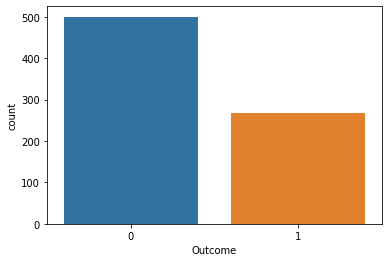

In [61]:
sns.countplot(data=df,x=df['Outcome'])

Conclusion :

    Data contains information more about patients who are not having diabetes.
    i.e. Unbalanced data

In [62]:
#Split data

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)


In [63]:
#Build model and fit

model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
#Demonstrate actual and predicted values

pd.DataFrame({"actual":ytest,"prediction":ypred}).head()


,actual,prediction
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0


Accuracy : 0.8246753246753247
Report :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



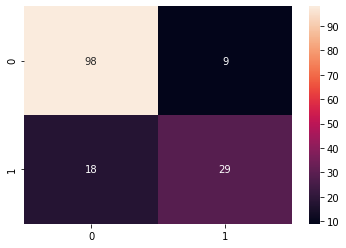

In [65]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)

Conclusion :

Confusion Matrix is a performance measurement for machine learning classification.

    True Positive:
      You predicted positive and it’s actual is positive.
    True Negative:
      Interpretation: You predicted negative and it’s actual is Negative.
    False Positive: (Type 1 Error)
      You predicted positive and it’s actual is Negative.
    False Negative: (Type 2 Error)
      Interpretation: You predicted negative and it’s actual is positive.

Accuracy :

    Overall performence of the model.
      (TP+TN)/(TP+TN_FP+FN) = 0.82

Recall / Sensitivity:

    Out of all the positive classes, how much we predicted correctly. 
    It should be high as possible.
      TP/(TP+FN) = 0.92 for 0 and 0.62 for 1

Precision :

    Out of all the positive classes we have predicted correctly, 
    how many are actually positive.
      TP/(TP+FP) = 0.84 for 0 and 0.76 for 1

F1 Score :

    The F-score is a way of combining the precision and recall of the model, and 
    it is defined as the harmonic mean of the model’s precision and recall.
      (2*Recall*Precision) / (Recall + Precision) = 0.88 for 0 and 0.68 for 1

This accuracy can incresed by balancing data. i.e. Getting same number of information rows for both classes.


###Tunning Hyperparameters for Logistic Regression

In [66]:
# help(LogisticRegression)
#tune solver,penalty,C
model=LogisticRegression()
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty=['l1', 'l2', 'elasticnet']
c=[100,10,1,0.1,0.01,0.001]

In [ ]:
kfoldcv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5,random_state=1)
grid=dict(solver=solver,penalty=penalty,C=c)
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfoldcv,scoring="accuracy")
res=grid_cv.fit(x,y)

In [68]:
print(res.best_score_)
print(res.best_params_)

0.7770608339029392
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [69]:
from sklearn.model_selection import train_test_split
model=LogisticRegression(solver="lbfgs",C=100,penalty='l2')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy : 0.8181818181818182
Report :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



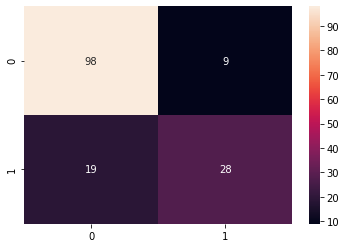

In [70]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)

##ROC - AUC curve

Sensitivity = True Positive Rate

Specificity = True Negative Rate

In [71]:
# Find the probability for prediction of classes
ypred_prob=model.predict_proba(xtest)
# Get probability for single class
ypred_prob[:,1]

array([0.96264389, 0.17597099, 0.11388715, 0.61401279, 0.14657637,
       0.04384157, 0.74804879, 0.8470892 , 0.48582998, 0.3541222 ,
       0.58377879, 0.95623644, 0.30595115, 0.2726506 , 0.14358662,
       0.18950381, 0.85142184, 0.03393299, 0.39250034, 0.28125787,
       0.64862574, 0.45543132, 0.30269032, 0.06805268, 0.06146918,
       0.38584933, 0.05533475, 0.910372  , 0.12155431, 0.15339658,
       0.45774634, 0.27455519, 0.11006916, 0.50028187, 0.10980701,
       0.68165549, 0.41871584, 0.08833792, 0.34987099, 0.71886366,
       0.32180388, 0.25022716, 0.18092729, 0.79986347, 0.68021662,
       0.01106776, 0.09005646, 0.20276624, 0.40282112, 0.31810228,
       0.39659468, 0.20892629, 0.8697802 , 0.46422998, 0.152485  ,
       0.00399466, 0.07027157, 0.53403737, 0.2998586 , 0.09279781,
       0.65240222, 0.45408946, 0.11547499, 0.78857672, 0.66597184,
       0.90965744, 0.67736689, 0.14193161, 0.38106833, 0.11653285,
       0.13471285, 0.44759404, 0.10877859, 0.9547394 , 0.84314

In [73]:

# roc curve for models
fpr, tpr, thresh1 = roc_curve(ytest, ypred_prob[:,1])
auc=roc_auc_score(ytest,ypred_prob[:,1])
print("AUC : ",auc)

AUC :  0.8687611851262677


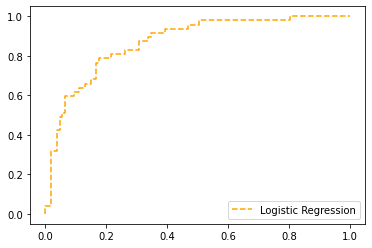

In [74]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.legend()

##Multinomial Classification - Iris data

In [87]:
df = pd.read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


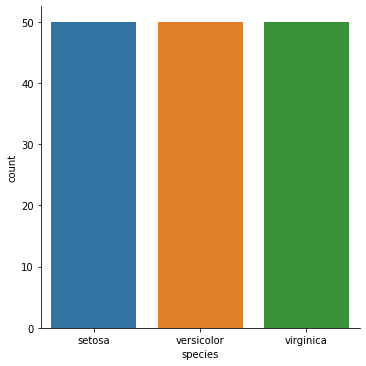

In [90]:
sns.catplot(df['species'],data=df,kind='count')


Conclusion :

    Information for all classes is balanced.

In [91]:
# Encoding categorical data
df['species']=df['species'].astype('category')
df['species_cat']=df['species'].cat.codes

In [92]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_cat
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [93]:
x=df.drop(columns=['species','species_cat'])
y=df['species_cat']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [94]:
#Build model and fit

model=LogisticRegression(multi_class='multinomial')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
#Demonstrate actual and predicted values

pd.DataFrame({"actual":ytest,"prediction":ypred}).head()

,actual,prediction
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


Accuracy : 1.0
Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



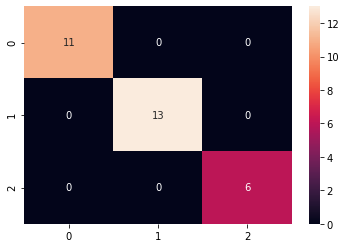

In [96]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)

Conclusion :

Confusion Matrix is a performance measurement for machine learning classification.

    True Positive:
      You predicted positive and it’s actual is positive.
    True Negative:
      Interpretation: You predicted negative and it’s actual is Negative.
    False Positive: (Type 1 Error)
      You predicted positive and it’s actual is Negative.
    False Negative: (Type 2 Error)
      Interpretation: You predicted negative and it’s actual is positive.

Accuracy :

    Overall performence of the model.
      (TP+TN)/(TP+TN_FP+FN) = 1.0

Recall / Sensitivity :

    Out of all the positive classes, how much we predicted correctly. 
    It should be high as possible.
      TP/(TP+FN) = 1.0 for 0 and 1.0 for 1

Precision :

    Out of all the positive classes we have predicted correctly, 
    how many are actually positive.
      TP/(TP+FP) = 1.0 for 0 and 1.0 for 1

F1 Score :

    The F-score is a way of combining the precision and recall of the model, and 
    it is defined as the harmonic mean of the model’s precision and recall.
      (2*Recall*Precision) / (Recall + Precision) = 1.0 for 0 and 1.0 for 1




##ROC - AUC curve

In [97]:
ypred_prob=model.predict_proba(xtest)

In [98]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3
for i in range(n_class):    
    fpr[str(i)], tpr[str(i)], thresh[str(i)] = roc_curve(ytest, ypred_prob[:,i],pos_label=i)


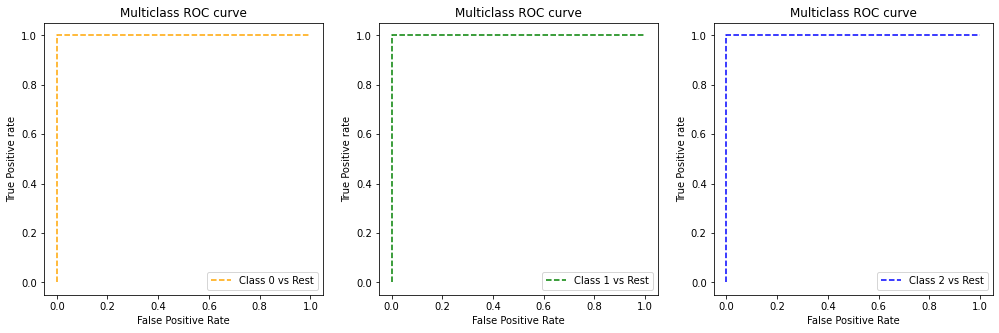

In [102]:
# plotting    
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(fpr[str(0)], tpr[str(0)], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.subplot(1,3,2)
plt.plot(fpr[str(1)], tpr[str(1)], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.subplot(1,3,3)
plt.plot(fpr[str(2)], tpr[str(2)], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')